In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploring Data**

In [4]:
df.drop("customerID", inplace=True, axis=1)
df.iloc[0]

gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1 = df[df.TotalCharges!=" "] 

In [10]:
df1.shape

(7032, 20)

In [11]:
df1["TotalCharges"] = pd.to_numeric(df1.TotalCharges)

C:\Windows\Temp\ipykernel_11180\1141137203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["TotalCharges"] = pd.to_numeric(df1.TotalCharges)


In [12]:
df1["TotalCharges"].dtype

dtype('float64')

In [13]:
#FİND HOW MANY LOYAL CUSTOMERS ARE LEAVİNG

Text(0.5, 1.0, 'Customer Churn Prediction Vis')

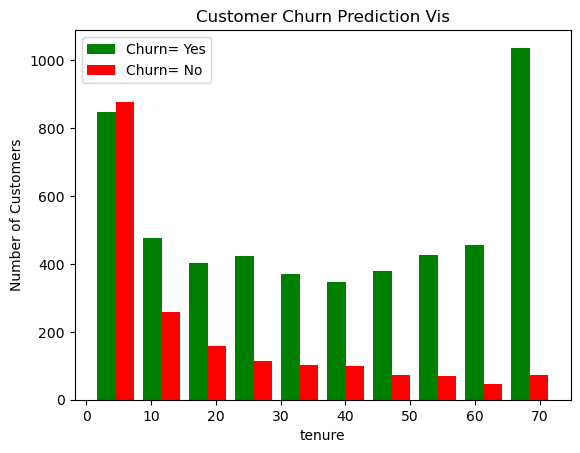

In [14]:
tenure_churn_no = df1[df1.Churn=="No"].tenure
tenure_churn_yes = df1[df1.Churn=="Yes"].tenure

import matplotlib.pyplot as plt
plt.hist([tenure_churn_no, tenure_churn_yes], color = ["green", "red"], label=["Churn= Yes","Churn= No"])
plt.legend()

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Vis")

In [15]:
df1[df1.Churn=="No"].MonthlyCharges

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5163, dtype: float64

Text(0.5, 1.0, 'Customer Churn Prediction Vis')

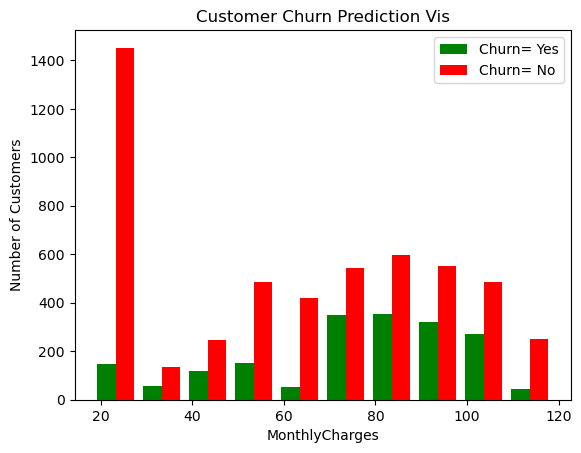

In [16]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges

plt.hist([mc_churn_yes, mc_churn_no], color = ["green", "red"], label=["Churn= Yes","Churn= No"])
plt.legend()

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Vis")

In [17]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")

In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df1.replace("No internet service", "No", inplace = True)
df1.replace("No phone service", "No", inplace = True)

C:\Windows\Temp\ipykernel_11180\3144881796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service", "No", inplace = True)
C:\Windows\Temp\ipykernel_11180\3144881796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service", "No", inplace = True)


In [20]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
yes_no_columns = ["Partner", "Dependents","PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                 "TechSupport", "StreamingTV", "StreamingMovies","PaperlessBilling", "Churn"]

for columns in yes_no_columns:
    df1[columns].replace({"Yes":1, "No":0}, inplace = True)

C:\Windows\Temp\ipykernel_11180\1952560836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[columns].replace({"Yes":1, "No":0}, inplace = True)


In [22]:
for columns in df1:
    print(f"{columns}: {df1[columns].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [23]:
df1["gender"].replace({"Female":1, "Male":0}, inplace=True)

C:\Windows\Temp\ipykernel_11180\3198163853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["gender"].replace({"Female":1, "Male":0}, inplace=True)


In [24]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [25]:
df2 = pd.get_dummies(data=df1, columns= ["InternetService", "Contract", "PaymentMethod"])

In [26]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [27]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5100,1,0,0,0,1,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
55,0,1,0,0,18,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4309,1,0,0,0,22,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
5496,0,0,1,1,43,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [28]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

**scaling the data**

In [29]:
#scale the data only have large value

In [30]:
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [31]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3783,1,0,1,0,0.915493,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
5820,0,0,1,0,0.830986,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
6774,1,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [32]:
#data is ready for ML, before it split data

In [33]:
X = df2.drop("Churn", axis=1)
y=df2.Churn

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

In [37]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [38]:
len(X_train.columns)

26

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
# set NN up
#sequential --> stack of layers in NN
# dense:neuron is connected with every other neuron, how many, col num: 26
# epochs: start with small number, if you see accuracy is raising then increase it.
#input layer--> input_shape parametresi ile verildi
# hidden layer--> 20
#output layer--> 1
model = keras.Sequential([ 
    keras.layers.Dense(20, input_shape=(26,), activation = "relu" ), 
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer= "adam",
              loss = "binary_crossentropy", # output is binary; churn or not
              metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 2s 2ms/step - loss: 0.4642 - accuracy: 0.7644
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.7961
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4204 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4171 - accuracy: 0.8020
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4120 - accuracy: 0.8043
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4098 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.8215
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3837 - accuracy: 0.8194
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.8215
Epoch 84/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8215
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3828 - accuracy: 0.8199
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8210
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8215
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8190
Epoch 89/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3825 - accuracy: 0.8213
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 

In [41]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4517 - accuracy: 0.7846


[0.4516701400279999, 0.7846481800079346]

In [42]:
y_preds = model.predict(X_test)
y_preds[:5] # it needs to convert to 1-dim and value conversion to 1 or 0. 

44/44 [==============================] - 0s 3ms/step


array([[0.2578361 ],
       [0.5009212 ],
       [0.00940029],
       [0.7240808 ],
       [0.55186194]], dtype=float32)

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [44]:
y_preds_converted = []
for i in y_preds:
    if i > 0.5:
        y_preds_converted.append(1)
    else: y_preds_converted.append(0)

In [45]:
y_preds_converted[:10]

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0]

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_preds_converted))

# accuracy is useless if data is unbalanced: there a few churn (class 1) in compare with loyals, important thing is to detect them. 
# f1 score is better measure. for churn it is .62
# f1 score of class 1 should be improved if unbalance data is handled with one of 5 techniques. 

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.65      0.55      0.60       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

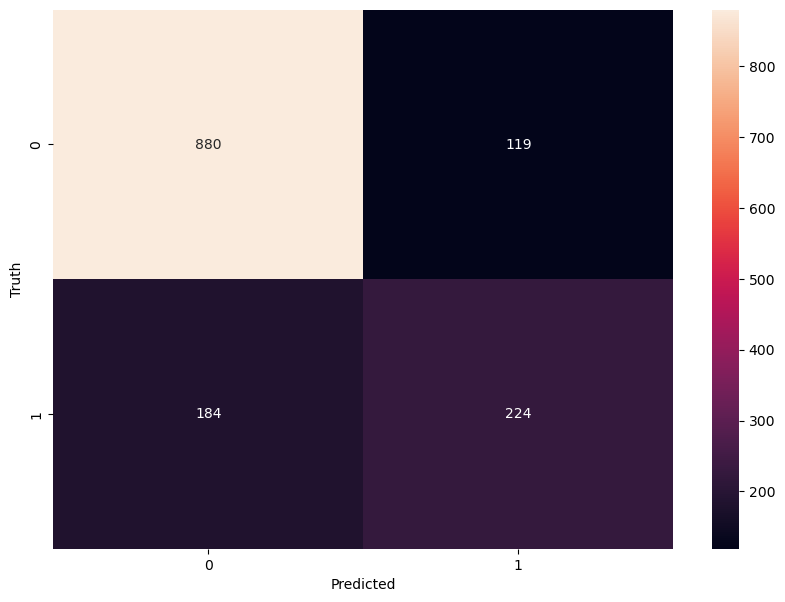

In [47]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test, predictions=y_preds_converted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt= "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [48]:
# accuracy = correct preds/ total preds

round((880+235)/(880+235+173+119),2)

0.79

In [49]:
# precision: for 0 class: correct prediction of zero / total preds of 0
round(880/(880+173),2)

0.84

In [50]:
# precision: for 1 class: correct prediction of zero / total preds of 0
round(235/(235+119),2)

0.66

In [51]:
# recall-reality-truth for class 0
round(880/(880+119), 2)

# recall-reality-truth for class 1
round(235/(235+173), 2)

0.58

Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling,
1) Build a deep learning model to predict churn rate at bank.
2) Once model is built, print classification report and analyze precision, recall and f1-score

## Handling imbalanced dataset

In [54]:
# class_weight is used to handle imbalance dataset. 
import numpy as np

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([ 
        keras.layers.Dense(26, input_dim = 26, activation = "relu" ),
        keras.layers.Dense(15, activation = "relu" ),
        keras.layers.Dense(1, activation = "sigmoid")
])

    model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs = 100)
    else:
        model.fit(X_train, y_train, epochs = 100, class_weight=weights)
        
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4877 - accuracy: 0.7525
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4319 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4221 - accuracy: 0.7993
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8080
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4098 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4054 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3564 - accuracy: 0.8318
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8324
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8347
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3549 - accuracy: 0.8348
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8357
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8356
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.8361
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3525 - accuracy: 0.8332
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8356
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 

### 1. undersampling majority class

In [57]:
df1.Churn.value_counts() # there is imbalance, 0:loyals, 1: churn

0    5163
1    1869
Name: Churn, dtype: int64

In [63]:
count_class_0 = df1.Churn.value_counts()[0]
count_class_1 = df1.Churn.value_counts()[1]

In [64]:
count_class_0 

5163

In [65]:
count_class_1

1869

In [66]:
#class count
count_class_0, count_class_1 = df1.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [70]:
# divide by class
df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]

In [71]:
df_class_0.shape

(5163, 27)

In [72]:
df_class_1.shape

(1869, 27)

**undersampling**

In [ ]:
# it is done with sample function. 
# sample function is just blindly copying current samples and creating new samples. 
#SMOTE is better: generates new samples out of current samples.

In [77]:
df_class_0_under = df_class_0.sample(count_class_1)

In [81]:
# now concate tho df. 

df_test_under = pd.concat([df_class_0_under, df_class_1], axis = 0) # should be an array, []
df_test_under.shape

(3738, 27)

In [83]:
print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [84]:
X = df_test_under.drop("Churn", axis = 1)
y = df_test_under["Churn"]

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify= y) 

#stratify make sure to have balance samples
#with stratify class distribution is equal
# X_train, X_test will have balanced samples from 0 and 1 class

In [86]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

**training model with def**

In [87]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)
#f1 score improved from 56 to 75
# accuracy was 77, it dropped 74

Epoch 1/100
94/94 [==============================] - 5s 7ms/step - loss: 0.5920 - accuracy: 0.7104
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5084 - accuracy: 0.7579
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4936 - accuracy: 0.7696
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4853 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4804 - accuracy: 0.7699
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4777 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4748 - accuracy: 0.7766
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4716 - accuracy: 0.7796
Epoch 9/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4698 - accuracy: 0.7809
Epoch 10/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4680 - accuracy: 0.7836
Epoch 11/

Epoch 83/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8254
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3881 - accuracy: 0.8278
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3872 - accuracy: 0.8204
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3871 - accuracy: 0.8264
Epoch 87/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8271
Epoch 88/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3866 - accuracy: 0.8261
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8294
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3866 - accuracy: 0.8254
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3835 - accuracy: 0.8271
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3839 - accuracy: 0.8328


## Method2 Oversampling

In [88]:
count_class_0, count_class_1
#we'll oversample class1

(5163, 1869)

In [91]:
df_class_1.shape

(1869, 27)

In [93]:
df_class_1.sample(200).shape

(200, 27)

In [94]:
df_class_1.sample(2000, replace = True).shape # replace came to say how it wil duplicate. after 1869, it randomly copy some

(2000, 27)

In [97]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)

In [98]:
df_class_1_over.shape

(5163, 27)

In [101]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)
df_test_over.shape

(10326, 27)

In [102]:
print("Random under-sampling:")
print(df_test_over.Churn.value_counts())

Random under-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [103]:
X = df_test_over.drop("Churn", axis = 1)
y = df_test_over["Churn"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify= y) 

In [104]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [105]:
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 4s 6ms/step - loss: 0.5556 - accuracy: 0.7262
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4906 - accuracy: 0.7632
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4804 - accuracy: 0.7667
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4744 - accuracy: 0.7702
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4691 - accuracy: 0.7718
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4651 - accuracy: 0.7743
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4621 - accuracy: 0.7786
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4575 - accuracy: 0.7837
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4544 - accuracy: 0.7817
Epoch 10/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4510 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3655 - accuracy: 0.8373
Epoch 82/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3660 - accuracy: 0.8364
Epoch 83/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8350
Epoch 84/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3636 - accuracy: 0.8374
Epoch 85/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8380
Epoch 86/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3616 - accuracy: 0.8407
Epoch 87/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3608 - accuracy: 0.8403
Epoch 88/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8384
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8398
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 

In [106]:
#f1 score improved from 56 to 75 with under-sampling
#f1 score improved from 56 to 78 with over-sampling
# accuracy is also a little bit increased from 74 to 78. 

## Method3: SMOTE

Oversampling by producing synthetic samples

In [108]:
# sample function is just blindly copying current samples and creating new samples. 
#SMOTE is better: generates new samples out of current samples.
# to do that it uses k-nearest neighbour algorithm. 

In [109]:
X = df2.drop("Churn", axis = 1)
y = df2["Churn"]

In [111]:
y.value_counts()#imbalance exists

0    5163
1    1869
Name: Churn, dtype: int64

In [113]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=15, stratify= y_sm) 

In [117]:
# be sure stratify works
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [118]:
#call the DL function
y_preds = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 5s 6ms/step - loss: 0.5264 - accuracy: 0.7458
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4686 - accuracy: 0.7746
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4586 - accuracy: 0.7835
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4524 - accuracy: 0.7861
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4445 - accuracy: 0.7916
Epoch 6/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4420 - accuracy: 0.7915
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4367 - accuracy: 0.7965
Epoch 8/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4324 - accuracy: 0.7977
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4287 - accuracy: 0.8005
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4256 - accura

259/259 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8481
Epoch 82/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3418 - accuracy: 0.8489
Epoch 83/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3410 - accuracy: 0.8494
Epoch 84/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3416 - accuracy: 0.8472
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3410 - accuracy: 0.8473
Epoch 86/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3392 - accuracy: 0.8470
Epoch 87/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3389 - accuracy: 0.8496
Epoch 88/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3392 - accuracy: 0.8500
Epoch 89/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8501
Epoch 90/100
259/259 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 

In [ ]:
#f1 score improved from 56 to 75 with under-sampling
#f1 score improved from 56 to 78 with over-sampling
#f1 score improved from 56 to 78 with SMOTE
# accuracy stay almost the same.  

## Method4: Use of Ensemble with undersampling

In [120]:
df2.Churn.value_counts()#see imbalance

0    5163
1    1869
Name: Churn, dtype: int64

In [121]:
X = df2.drop("Churn", axis = 1)
y = df2["Churn"]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify= y) 

In [124]:
y_train.value_counts() #see imbalance

0    4130
1    1495
Name: Churn, dtype: int64

In [126]:
#check ratio
4130/1495 # 1:3 so, i need to have 3 batches

2.762541806020067

In [127]:
4130/3 # if i have 3 batches , will i-have 1376

1376.6666666666667

In [129]:
df3= X_train.copy()
df3["Churn"] = y_train

In [132]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [133]:
# you divide major class into batches

In [135]:
# check the major class: 0
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [139]:
#one way do sample
#df3_class0.sample(1495)
#or row selection
df3_class0[:1495]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6124,1,0,1,1,0.788732,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1992,1,0,0,0,0.225352,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
6164,0,1,1,0,0.619718,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
5302,1,0,1,1,0.126761,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [145]:
def get_train_batch(df_majority, df3_minority, start, end):
    df_train= pd.concat([df_majority[start:end], df3_minority], axis = 0)
    
    X_train = df_train.drop("Churn", axis = 1)
    y_train = df_train.Churn
    
    return X_train, y_train

In [146]:
X_train, y_train = get_train_batch(df_class_0, df3_class1, 0, 1495)

In [147]:
X_train.shape

(2990, 26)

In [148]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 3s 6ms/step - loss: 0.5890 - accuracy: 0.7334
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5118 - accuracy: 0.7552
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4970 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4901 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4867 - accuracy: 0.7659
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4829 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4798 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4789 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4760 - accuracy: 0.7702
Epoch 10/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4736 - accuracy: 0.7736
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4025 - accuracy: 0.8054
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8080
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3993 - accuracy: 0.8124
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4008 - accuracy: 0.8107
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8130
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3997 - accuracy: 0.8110
Epoch 89/100
94/94 [==============================] - 1s 11ms/step - loss: 0.3976 - accuracy: 0.8137
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3975 - accuracy: 0.8161
Epoch 91/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4035 - accuracy: 0.8120
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3984 - accuracy: 0.8191
Epoch 93/100

In [149]:
X_train, y_train = get_train_batch(df_class_0, df3_class1, 1495,2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6265 - accuracy: 0.6759
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5188 - accuracy: 0.7565
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4819 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4781 - accuracy: 0.7712
Epoch 7/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4757 - accuracy: 0.7662
Epoch 8/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4756 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4748 - accuracy: 0.7656
Epoch 10/100
94/94 [==============================] - 1s 10ms/step - loss: 0.4722 - accuracy: 0.7619
Epoch 11

Epoch 83/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4074 - accuracy: 0.8114
Epoch 84/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4064 - accuracy: 0.8114
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4048 - accuracy: 0.8127
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4070 - accuracy: 0.8110
Epoch 87/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4037 - accuracy: 0.8137
Epoch 88/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4031 - accuracy: 0.8130
Epoch 89/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4040 - accuracy: 0.8110
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4025 - accuracy: 0.8137
Epoch 91/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4026 - accuracy: 0.8157
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4020 - accuracy: 0.8104


In [150]:
X_train, y_train = get_train_batch(df_class_0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
83/83 [==============================] - 4s 6ms/step - loss: 0.6212 - accuracy: 0.6694
Epoch 2/100
83/83 [==============================] - 1s 7ms/step - loss: 0.5183 - accuracy: 0.7586
Epoch 3/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4912 - accuracy: 0.7674
Epoch 4/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4855 - accuracy: 0.7689
Epoch 5/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4779 - accuracy: 0.7708
Epoch 6/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4742 - accuracy: 0.7727
Epoch 7/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4710 - accuracy: 0.7780
Epoch 8/100
83/83 [==============================] - 1s 8ms/step - loss: 0.4679 - accuracy: 0.7738
Epoch 9/100
83/83 [==============================] - 1s 6ms/step - loss: 0.4665 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 1s 7ms/step - loss: 0.4634 - accuracy: 0.7825
Epoch 11/

Epoch 83/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8273
Epoch 84/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8269
Epoch 85/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3840 - accuracy: 0.8254
Epoch 86/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3818 - accuracy: 0.8235
Epoch 87/100
83/83 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8285
Epoch 88/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8216
Epoch 89/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8254
Epoch 90/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8254
Epoch 91/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8266
Epoch 92/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8277


In [151]:
vote1 = 0
vote2 = 0
vote3 = 1

vote1+vote2+vote3 # when you get 1, it means majority vote is 0

1

In [152]:
vote1 = 0
vote2 = 1
vote3 = 1

vote1+vote2+vote3 # when you get 2 and 3, it means majority vote is 1
                    # logic: anything greater than 1 means 1

2

In [153]:
len(y_pred1)

1407

In [154]:
#final prediction will be majority vote

y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [156]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [ ]:
# so ML is trail and error
#here SMOTE worked best

## Exercise

#### Exercise: Handling imbalanced data in machine learning

1. Use [this notebook](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/13_imbalanced/handling_imbalanced_data.ipynb) but handle imbalanced data using simple logistic regression from skelarn library. The original notebook using neural network but you need to use sklearn logistic regression or any other classification model and improve the f1-score of minority class using,
    1. Undersampling
    1. Oversampling: duplicate copy
    1. OVersampling: SMOT
    1. Ensemble

    [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/main/14_imbalanced/handling_imbalanced_data_exercise_solution_telecom_churn.ipynb)    
   
2. Take this dataset for bank customer churn prediction : https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling
    1. Build a deep learning model to predict churn rate at bank
    1. Once model is built, print classification report and analyze precision, recall and f1-score
    1. Improve f1 score in minority class using various techniques such as undersampling, oversampling, ensemble etc
    
    [Solution](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/14_imbalanced/Handling%20Imbalanced%20Data%20In%20Customer%20Churn%20Using%20ANN/Bank%20Turnover%20Customer%20Churn%20Using%20ANN.ipynb)
    
    Thanks https://github.com/src-sohail for providing this solution.

In [158]:
# use the same notebook, but use simple logistic regression
# 2. exercise: churn modelling csv, give dhaval a pull request for solution